In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

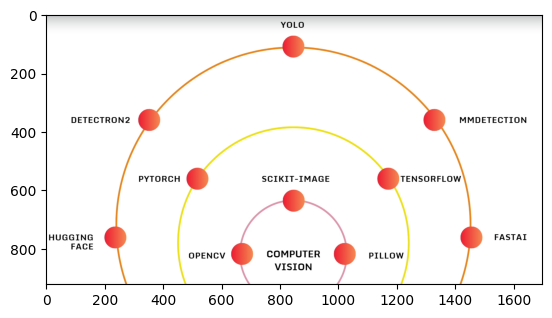

In [2]:
image=cv2.imread("./Images/Connection between Scikit Image, Open CV, Pillow, TF,Torch, YOLO.png")
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

### Perspective transformation

In [4]:
rows,cols,_=image_rgb.shape
input_point=np.float32([[50,50],[cols-50,50],[50,rows-50],[cols-50,rows-50]])
output_point=np.float32([[10,100],[cols-100,50],[100,rows-10],[cols-50,rows-100]])


'''
Transformation matrix for perspective transformation

3x3

a,b,c
d,e,f
g,h,1

a,b,c is responsible for horizontal scaling, rotation and translation
d,e,f is responsible for vertical scaling, rotation and translation
g,h perspective components that account for depth and skew

'''

M=cv2.getPerspectiveTransform(input_point,output_point)

(np.float64(-0.5), np.float64(1697.5), np.float64(921.5), np.float64(-0.5))

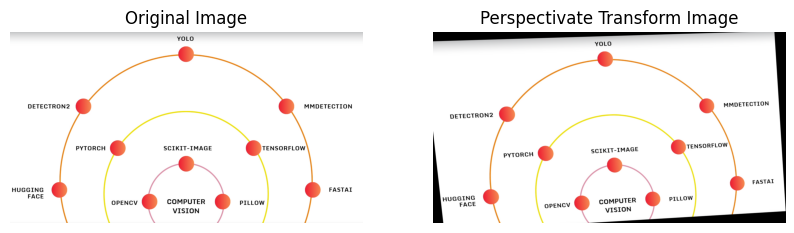

In [6]:
perspective_image=cv2.warpPerspective(image_rgb,M,(cols,rows))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(perspective_image)
plt.title("Perspectivate Transform Image")
plt.axis("off")

### Affine Transformation

(np.float64(-0.5), np.float64(1697.5), np.float64(921.5), np.float64(-0.5))

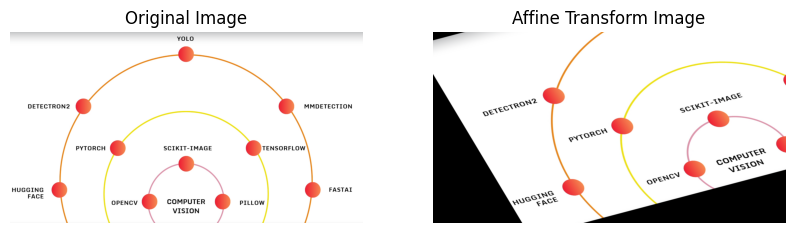

In [8]:
input_points=np.float32([[50,50],[200,50],[50,200]])
output_points=np.float32([[10,100],[200,50],[100,250]])
M=cv2.getAffineTransform(input_points,output_points)
affine_image=cv2.warpAffine(image_rgb,M,(cols,rows))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(affine_image)
plt.title("Affine Transform Image")
plt.axis("off")

### Rotation

(np.float64(-0.5), np.float64(1697.5), np.float64(921.5), np.float64(-0.5))

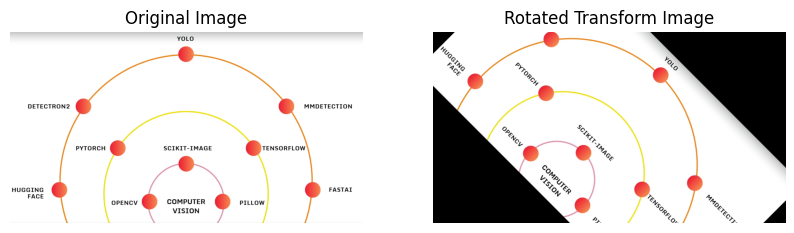

In [13]:
angle=-45
center=(cols//2,rows//2)
scale=1.0

M=cv2.getRotationMatrix2D(center,angle,scale)
rotated_image=cv2.warpAffine(image_rgb,M,(cols,rows))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(rotated_image)
plt.title("Rotated Transform Image")
plt.axis("off")

(np.float64(-0.5), np.float64(2158.5), np.float64(921.5), np.float64(-0.5))

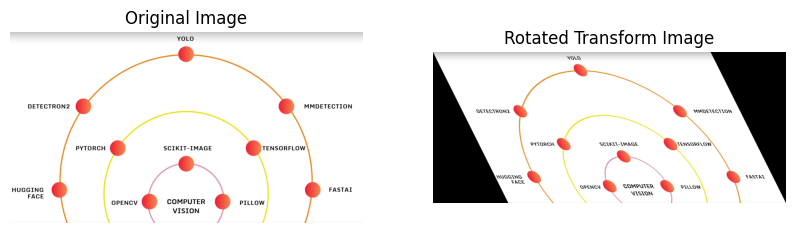

In [15]:
angle=-45
center=(cols//2,rows//2)
scale=1.0


shear_x,shear_y=0.5,0

M=np.float32([[1,shear_x,0],[shear_y,1,0]])

#M=cv2.getRotationMatrix2D(center,angle,scale)
sheared_image=cv2.warpAffine(image_rgb,M,(cols+int(shear_x*rows),rows))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(sheared_image)
plt.title("Rotated Transform Image")
plt.axis("off")

### Translation

(np.float64(-0.5), np.float64(1697.5), np.float64(921.5), np.float64(-0.5))

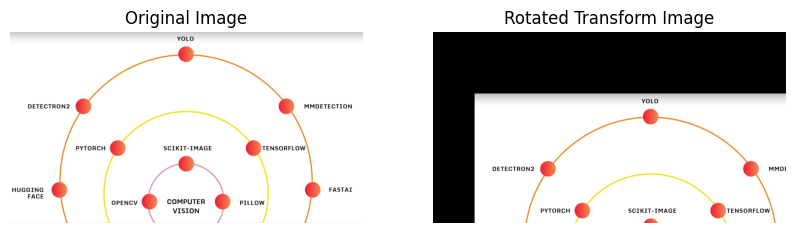

In [16]:

tx,ty=200,300

M=np.float32([[1,0,tx],[0,1,ty]])

translated_image=cv2.warpAffine(image_rgb,M,(cols,rows))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(translated_image)
plt.title("Rotated Transform Image")
plt.axis("off")